In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import tkinter as tk
from tkinter import *
from tkinter import PhotoImage
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Добавляем TensorFlow для нейронной сети
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)


In [3]:
set_seed(1000)
df_=pd.read_csv("diabetes.csv")
df=df_.copy()
df_for_pred = df_.copy()
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [4]:
def check_df(dataframe, head=5):
    print("------------------------------- Shape -------------------------------")
    print(dataframe.shape)
    print("------------------------------- Types -------------------------------")
    print(dataframe.dtypes)
    print("------------------------------- NA -------------------------------")
    print(dataframe.isnull().sum())
    print("------------------------------- Quantiles -------------------------------")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

------------------------------- Shape -------------------------------
(768, 9)
------------------------------- Types -------------------------------
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
------------------------------- NA -------------------------------
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
------------------------------- Quantiles -------------------------------
                           count    mean     std    min     0%     5%     50%     95%    

In [5]:
for col in df.columns:
    print(col,":",df[col].nunique())
    print("-------------------------------")

Pregnancies : 17
-------------------------------
Glucose : 136
-------------------------------
BloodPressure : 47
-------------------------------
SkinThickness : 51
-------------------------------
Insulin : 186
-------------------------------
BMI : 248
-------------------------------
DiabetesPedigreeFunction : 517
-------------------------------
Age : 52
-------------------------------
Outcome : 2
-------------------------------


In [6]:
num_cols = [col for col in df.columns if col != "Outcome"]

In [7]:
def target_num(dataframe, target, num_cols):
    print("\n\n",dataframe.groupby(target)[num_cols].mean())


In [8]:
target_num(df,"Outcome",num_cols)




          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age
Outcome                                                                                                     
0              3.298  109.980         68.184         19.664   68.792 30.304                     0.430 31.190
1              4.866  141.257         70.825         22.164  100.336 35.143                     0.550 37.067


<Axes: xlabel='Outcome'>

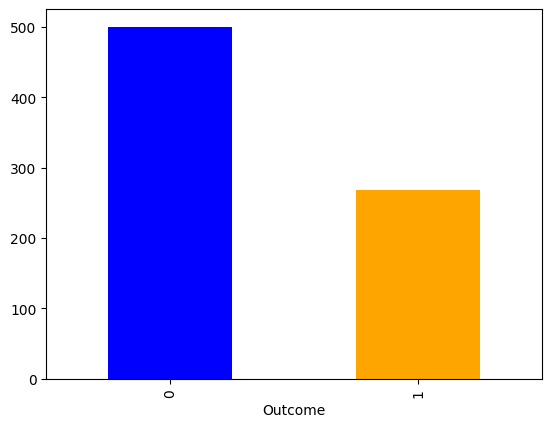

In [9]:
df["Outcome"].value_counts().plot.bar(color=['blue', 'orange'])

In [10]:
num_cols_rus_y = ["Количество беременностей", "Уровень глюкозы", "Артериального давление", "Толщина кожи", "Инсулин", "Индекс массы тела", "Процент диабета", "Возраст"]
num_cols_rus_x = ["количества беременностей", "уровня глюкозы", "артериального давления", "толщины кожи", "инсулина", "индекса массы тела", "процента диабета", "возраста"]


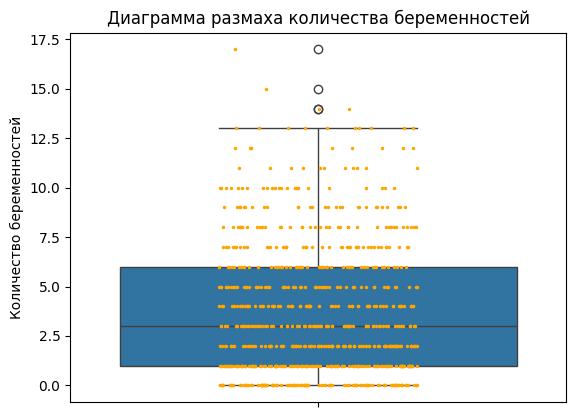

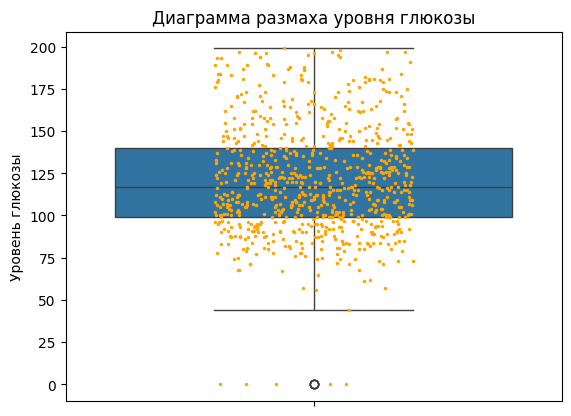

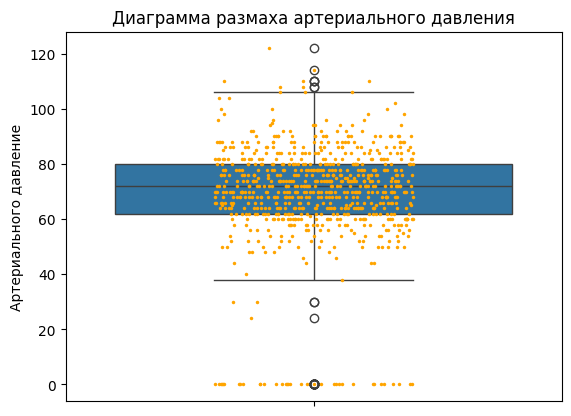

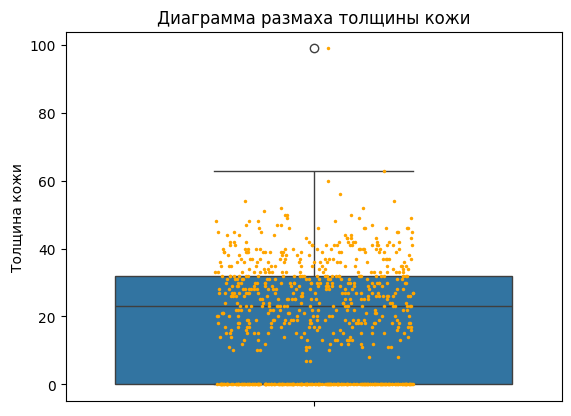

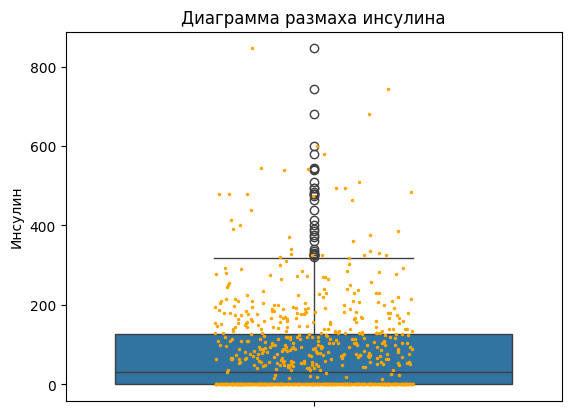

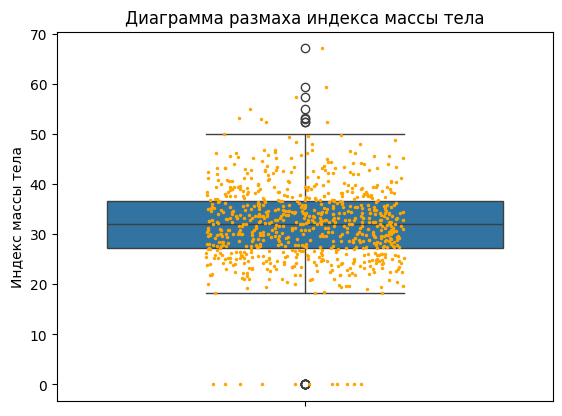

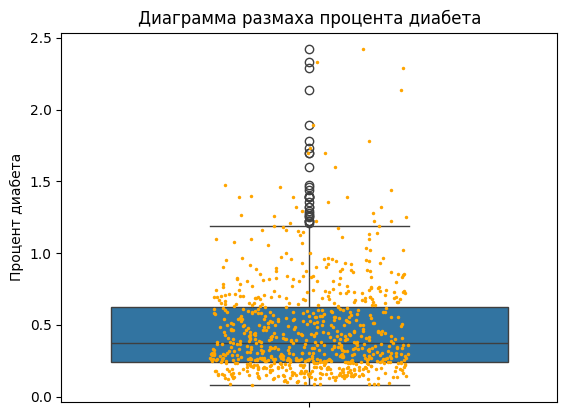

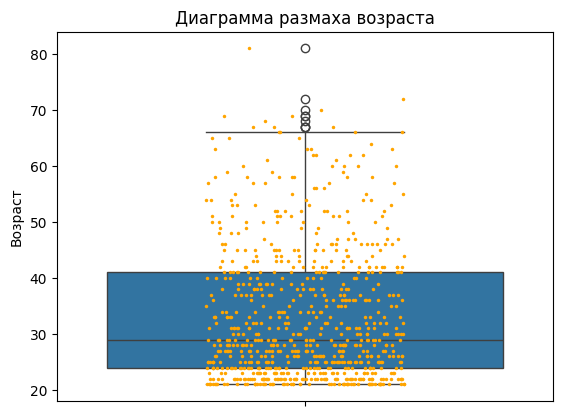

In [11]:
for col in range(len(num_cols)):
    ax =sns.boxplot(data=df[num_cols[col]])
    ax =sns.stripplot( data=df[num_cols[col]], color="orange", jitter=0.2, size=2.5)
    plt.title(f'Диаграмма размаха {num_cols_rus_x[col]}')
    plt.ylabel(f'{num_cols_rus_y[col]}')
    plt.show()

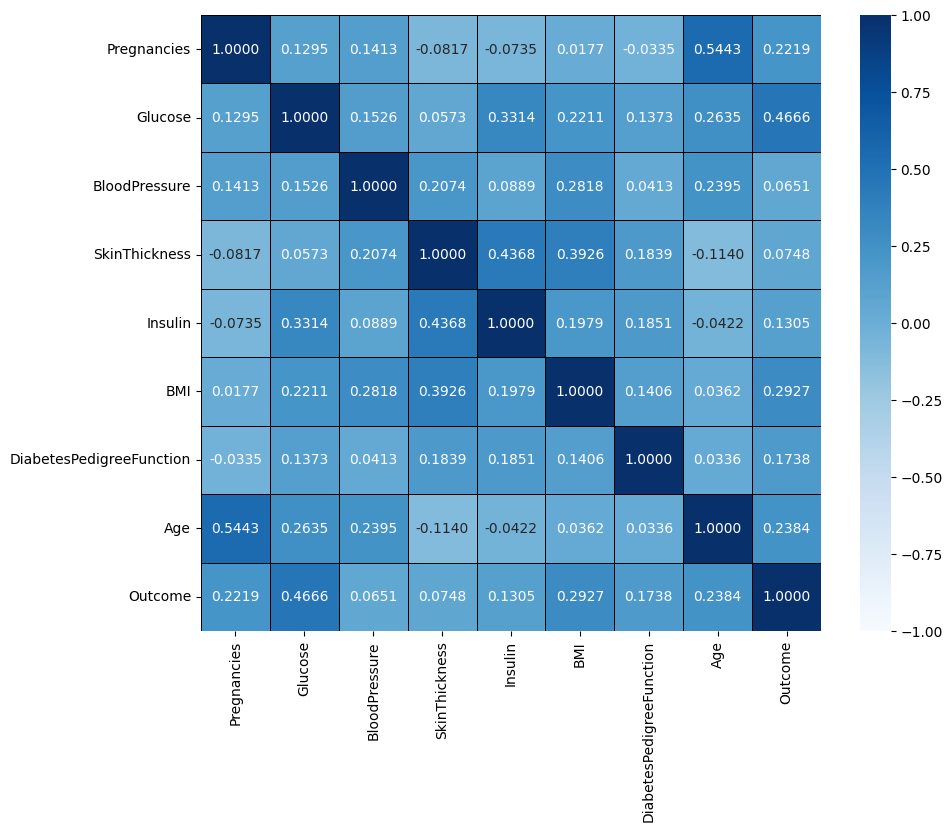

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax=ax, cmap="Blues")
plt.show()

In [13]:
missing= ["Glucose","BloodPressure","SkinThickness","Insulin","BMI" ]
df[missing] = df[missing].replace(0, np.nan)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [14]:
for col in missing:
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = df[df["Outcome"]==0][col].median()
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = df[df["Outcome"]==1][col].median()


In [15]:
df.head(10)
df_withoutNull = df.copy()


In [16]:
df['Age_new'] = pd.cut(x=df['Age'], bins=[20,29,45,max(df["Age"])],labels = ["young","mature","senior"])

df["BMI_new"] = pd.cut(x=df['BMI'], bins=[min(df["BMI"])-1,18.5,25,30,max(df["BMI"])],labels = ["underweight","weight","overweight","obese"])

df["Glucose_new"] = pd.cut(x=df['Glucose'], bins=[min(df["Glucose"])-1,140,max(df["Glucose"])],labels = ["normal","abnormal"])

df["BloodPressure_new"] = pd.cut(x=df['BloodPressure'], bins=[min(df["BloodPressure"])-1,80,90,max(df["BloodPressure"])],labels = ["normal","Hypertension_Stage_1","Hypertension_Stage_2"])


In [17]:
df["Glucose_Insulin "]=df["Glucose"]*df["Insulin"]
df["Insulin_BMI"]=df["Insulin"]*df["BMI"]
df["Glucose_BloodPressure"]= df["Glucose"]* df["BloodPressure"]
df["Insulin_BloodPressure"]= df["Insulin"]*df["BloodPressure"]

In [18]:
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="matureUnderWeight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="weight"),"AGE_BMI"]="matureWeight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="matureOverweight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="obese"),"AGE_BMI"]="matureObese"

df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="youngUnderWeight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="weight"),"AGE_BMI"]="youngWeight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="youngOverweight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="obese"),"AGE_BMI"]="youngObese"

df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="seniorUnderweight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="weight"),"AGE_BMI"]="seniorWeight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="seniorOverweight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="obese"),"AGE_BMI"]="seniorObese"

df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="matureNormal"
df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="matureHypertension_Stage_1"
df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="matureHypertension_Stage_2"

df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="youngNormal"
df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="youngHypertension_Stage_1"
df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="youngHypertension_Stage_2"

df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="seniorNormal"
df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="seniorHypertension_Stage_1"
df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="seniorHypertension_Stage_2"

df.loc[(df["Age_new"]=="mature") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="matureNormal"
df.loc[(df["Age_new"]=="mature") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="matureAbnormal"

df.loc[(df["Age_new"]=="young") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="youngNormal"
df.loc[(df["Age_new"]=="young") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="youngabnormal"

df.loc[(df["Age_new"]=="senior") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="seniorNormal"
df.loc[(df["Age_new"]=="senior") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="seniorAbnormal"


In [19]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_new,BMI_new,Glucose_new,BloodPressure_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI,AGE_BloodPressure,Age_Glucose
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,senior,obese,abnormal,normal,25086.000,5695.200,10656.000,12204.000,seniorObese,seniorNormal,seniorAbnormal
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,mature,overweight,normal,normal,8712.500,2726.500,5610.000,6765.000,matureOverweight,matureNormal,matureNormal
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,mature,weight,abnormal,normal,31018.500,3949.350,11712.000,10848.000,matureWeight,matureNormal,matureAbnormal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,overweight,normal,normal,8366.000,2641.400,5874.000,6204.000,youngOverweight,youngNormal,youngNormal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,obese,normal,normal,23016.000,7240.800,5480.000,6720.000,matureObese,matureNormal,matureNormal
5,5,116.000,74.000,27.000,102.500,25.600,0.201,30,0,mature,overweight,normal,normal,11890.000,2624.000,8584.000,7585.000,matureOverweight,matureNormal,matureNormal
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,young,obese,normal,normal,6864.000,2728.000,3900.000,4400.000,youngObese,youngNormal,youngNormal
7,10,115.000,70.000,27.000,102.500,35.300,0.134,29,0,young,obese,normal,normal,11787.500,3618.250,8050.000,7175.000,youngObese,youngNormal,youngNormal
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53,1,senior,obese,abnormal,normal,106971.000,16561.500,13790.000,38010.000,seniorObese,seniorNormal,seniorAbnormal
9,8,125.000,96.000,32.000,169.500,34.300,0.232,54,1,senior,obese,normal,Hypertension_Stage_2,21187.500,5813.850,12000.000,16272.000,seniorObese,seniorHypertension_Stage_2,seniorNormal


In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

In [21]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols=[col for col in cat_cols if col != "OUTCOME"]

In [22]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df,col)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_new,BMI_new,Glucose_new,BloodPressure_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI,AGE_BloodPressure,Age_Glucose
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,senior,obese,0,normal,25086.000,5695.200,10656.000,12204.000,seniorObese,seniorNormal,seniorAbnormal
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,mature,overweight,1,normal,8712.500,2726.500,5610.000,6765.000,matureOverweight,matureNormal,matureNormal
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,mature,weight,0,normal,31018.500,3949.350,11712.000,10848.000,matureWeight,matureNormal,matureAbnormal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,overweight,1,normal,8366.000,2641.400,5874.000,6204.000,youngOverweight,youngNormal,youngNormal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,obese,1,normal,23016.000,7240.800,5480.000,6720.000,matureObese,matureNormal,matureNormal


In [23]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cat_cols = [col for col in cat_cols if col not in binary_cols]

df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI_matureOverweight,AGE_BMI_matureWeight,AGE_BMI_seniorObese,AGE_BMI_seniorOverweight,AGE_BMI_seniorWeight,AGE_BMI_youngObese,AGE_BMI_youngOverweight,AGE_BMI_youngUnderWeight,AGE_BMI_youngWeight,AGE_BloodPressure_matureHypertension_Stage_2,AGE_BloodPressure_matureNormal,AGE_BloodPressure_seniorHypertension_Stage_1,AGE_BloodPressure_seniorHypertension_Stage_2,AGE_BloodPressure_seniorNormal,AGE_BloodPressure_youngHypertension_Stage_1,AGE_BloodPressure_youngHypertension_Stage_2,AGE_BloodPressure_youngNormal,Age_Glucose_matureNormal,Age_Glucose_seniorAbnormal,Age_Glucose_seniorNormal,Age_Glucose_youngNormal,Age_Glucose_youngabnormal,Age_new_mature,Age_new_senior,BMI_new_weight,BMI_new_overweight,BMI_new_obese,BloodPressure_new_Hypertension_Stage_1,BloodPressure_new_Hypertension_Stage_2
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,0,25086.000,5695.200,10656.000,12204.000,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,1,8712.500,2726.500,5610.000,6765.000,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,0,31018.500,3949.350,11712.000,10848.000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,1,8366.000,2641.400,5874.000,6204.000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,1,23016.000,7240.800,5480.000,6720.000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [24]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df[num_cols].head()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI_matureOverweight,AGE_BMI_matureWeight,AGE_BMI_seniorObese,AGE_BMI_seniorOverweight,AGE_BMI_seniorWeight,AGE_BMI_youngObese,AGE_BMI_youngOverweight,AGE_BMI_youngUnderWeight,AGE_BMI_youngWeight,AGE_BloodPressure_matureHypertension_Stage_2,AGE_BloodPressure_matureNormal,AGE_BloodPressure_seniorHypertension_Stage_1,AGE_BloodPressure_seniorHypertension_Stage_2,AGE_BloodPressure_seniorNormal,AGE_BloodPressure_youngHypertension_Stage_1,AGE_BloodPressure_youngHypertension_Stage_2,AGE_BloodPressure_youngNormal,Age_Glucose_matureNormal,Age_Glucose_seniorAbnormal,Age_Glucose_seniorNormal,Age_Glucose_youngNormal,Age_Glucose_youngabnormal,Age_new_mature,Age_new_senior,BMI_new_weight,BMI_new_overweight,BMI_new_obese,BloodPressure_new_Hypertension_Stage_1,BloodPressure_new_Hypertension_Stage_2
0,0.600,0.765,0.000,1.000,1.000,0.170,0.665,1.235,1,0,0.850,0.647,0.531,0.626,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
1,-0.400,-0.790,-0.375,0.143,0.000,-0.599,-0.056,0.118,0,1,-0.410,-0.330,-0.653,-0.270,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
2,1.000,1.630,-0.500,0.571,1.000,-0.962,0.783,0.176,1,0,1.307,0.072,0.779,0.403,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,-0.400,-0.691,-0.375,-0.714,-0.127,-0.434,-0.537,-0.471,0,1,-0.437,-0.358,-0.591,-0.363,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4,-0.600,0.494,-2.000,1.000,0.978,1.214,5.008,0.235,1,1,0.691,1.155,-0.683,-0.278,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [25]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1000)



ПОСТРОЕНИЕ ПОЛНОСВЯЗНОЙ НЕЙРОННОЙ СЕТИ
Архитектура модели:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,385 (64.00 KB)

 Trainable params: 16,385 (64.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6754 - loss: 0.6364 - val_accuracy: 0.6296 - val_loss: 0.5647 - learning_rate: 0.0010
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6786 - loss: 0.5318 - val_accuracy: 0.7685 - val_loss: 0.5026 - learning_rate: 0.0010
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7119 - loss: 0.4634 - val_accuracy: 0.8333 - val_loss: 0.4747 - learning_rate: 0.0010
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8135 - loss: 0.4081 - val_accuracy: 0.8426 - val_loss: 0.4607 - learning_rate: 0.0010
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7962 - loss: 0.4083 - val_accuracy: 0.8519 - val_loss: 0.4558 - learning_rate: 0.0010
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8392 - loss: 0.3725 - val_accuracy: 0.8426 - val_loss: 0.4536 - learning_rate: 0.0010
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8264 - loss: 0.3763 - val_ac

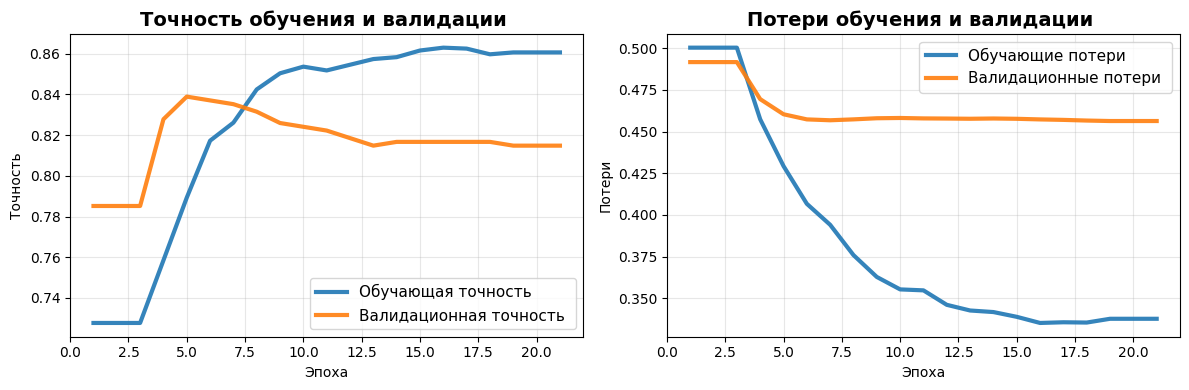

In [ ]:
#-------------------------- НЕЙРОННАЯ СЕТЬ TENSORFLOW --------------------------
print("\n" + "="*50)
print("ПОСТРОЕНИЕ ПОЛНОСВЯЗНОЙ НЕЙРОННОЙ СЕТИ")
print("="*50)

# Архитектура нейронной сети: 5 слоев (входной + 4 скрытых + выходной)
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Слой 1: 128 нейронов
    Dropout(0.3),
    Dense(64, activation='relu'),   # Слой 2: 64 нейрона
    Dropout(0.3),
    Dense(32, activation='relu'),   # Слой 3: 32 нейрона
    Dropout(0.2),
    Dense(16, activation='relu'),   # Слой 4: 16 нейронов
    Dense(1, activation='sigmoid')  # Выходной слой: 1 нейрон (бинарная классификация)
])

# Гиперпараметры
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

print("Архитектура модели:")
nn_model.summary()

# Обучение с записью истории
history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Предсказания и метрики
y_pred_nn_prob = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int).flatten()
nn_f1_score = f1_score(y_test, y_pred_nn)
nn_accuracy = accuracy_score(y_test, y_pred_nn)

print(f"\nF1-score нейронной сети: {nn_f1_score:.4f}")
print(f"Accuracy нейронной сети: {nn_accuracy:.4f}")

# --------------------------ГРАФИКИ ТОЧНОСТИ И ПОТЕРЬ --------------------------
def smooth_curve(points, window_size=5):
    
    if len(points) < window_size:
        return points
    smoothed = np.convolve(points, np.ones(window_size)/window_size, mode='valid')
    # Дополняем начало и конец исходными значениями
    padding = (window_size - 1) // 2
    result = np.pad(smoothed, (padding, len(points) - len(smoothed) - padding), mode='edge')
    return result

plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
epochs = range(1, len(history.history['accuracy']) + 1)

# данные
smooth_train_acc = smooth_curve(history.history['accuracy'], window_size=5)
smooth_val_acc = smooth_curve(history.history['val_accuracy'], window_size=5)

plt.plot(epochs, smooth_train_acc, label='Обучающая точность ', linewidth=3, alpha=0.9)
plt.plot(epochs, smooth_val_acc, label='Валидационная точность ', linewidth=3, alpha=0.9)
plt.title('Точность обучения и валидации ', fontsize=14, fontweight='bold')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# График функции потерь
plt.subplot(1, 2, 2)
# данные
smooth_train_loss = smooth_curve(history.history['loss'], window_size=5)
smooth_val_loss = smooth_curve(history.history['val_loss'], window_size=5)

plt.plot(epochs, smooth_train_loss, label='Обучающие потери ', linewidth=3, alpha=0.9)
plt.plot(epochs, smooth_val_loss, label='Валидационные потери ', linewidth=3, alpha=0.9)
plt.title('Потери обучения и валидации ', fontsize=14, fontweight='bold')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [27]:
des_model = DecisionTreeClassifier(random_state=1000)
des_model.fit(X_train, y_train)
y_pred_2 = des_model.predict(X_test)
decison_f1_score = f1_score(y_pred_2, y_test)

In [28]:
log_model = LogisticRegression(random_state=1000)
log_model.fit(X_train, y_train)
y_pred_3 = log_model.predict(X_test)
logistic_f1_score = f1_score(y_pred_3, y_test)


In [29]:
xgm_model= XGBClassifier(random_state=1000)
xgm_model.fit(X_train, y_train)
y_pred_4 =xgm_model.predict(X_test)
xgb_f1_score = f1_score(y_pred_4, y_test)

In [30]:
knn_model= KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_6 =knn_model.predict(X_test)
knn_f1_score = f1_score(y_pred_6, y_test)

In [31]:
rf_model = RandomForestClassifier(random_state=1000)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf)

In [32]:
lgbm_model= LGBMClassifier(verbosity=-1, random_state=1000)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
lgbm_f1 = f1_score(y_test, y_pred_lgbm)

In [33]:
models= [rf_model, lgbm_model, des_model, log_model, xgm_model, knn_model, nn_model]

best_model = None
best_accuracy = 0

for i, model in enumerate(models,1):
    if hasattr(model, 'feature_importances_'):
        model.fit(X_train, y_train)
        y_pred_i= model.predict(X_test)
        f1_score_model=f1_score(y_pred_i, y_test)
    else:
        # Для нейронной сети используем уже вычисленный F1
        f1_score_model = nn_f1_score if 'Sequential' in str(type(model)) else 0.7

    print(f'Model Name: {type(model).__name__}, F1-score: {f1_score_model:.4f}\n')
    print("#"*80)

    if f1_score_model> best_accuracy:
        best_accuracy=f1_score_model
        best_model = model

print(f"Лучшая модель: {type(best_model).__name__}, F1-score: {best_accuracy:.4f}")

Model Name: RandomForestClassifier, F1-score: 0.8049

################################################################################
Model Name: LGBMClassifier, F1-score: 0.8098

################################################################################
Model Name: DecisionTreeClassifier, F1-score: 0.7927

################################################################################
Model Name: LogisticRegression, F1-score: 0.7000

################################################################################
Model Name: XGBClassifier, F1-score: 0.8075

################################################################################
Model Name: KNeighborsClassifier, F1-score: 0.7000

################################################################################
Model Name: Sequential, F1-score: 0.7486

################################################################################
Лучшая модель: LGBMClassifier, F1-score: 0.8098


In [34]:
import pandas as pd
import numpy as np

def processing_and_prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    """
    Упрощенная функция для предсказания диабета на основе введенных параметров
    Возвращает предсказание (0 - отрицательный, 1 - положительный)
    """

    # Создаем словарь с входными данными
    input_data = {
        'Pregnancies': Pregnancies,
        'Glucose': Glucose,
        'BloodPressure': BloodPressure,
        'SkinThickness': SkinThickness,
        'Insulin': Insulin,
        'BMI': BMI,
        'DiabetesPedigreeFunction': DiabetesPedigreeFunction,
        'Age': Age
    }

    # Преобразуем в DataFrame
    df_pred = pd.DataFrame([input_data])

    # Логика для определения категорий (аналогично исходному коду)
    # Age категории
    if 20 <= Age <= 29:
        age_cat = "young"
    elif 30 <= Age <= 45:
        age_cat = "mature"
    else:
        age_cat = "senior"

    # BMI категории
    if BMI < 18.5:
        bmi_cat = "underweight"
    elif 18.5 <= BMI < 25:
        bmi_cat = "weight"
    elif 25 <= BMI < 30:
        bmi_cat = "overweight"
    else:
        bmi_cat = "obese"

    # Glucose категории
    if Glucose < 140:
        glucose_cat = "normal"
    else:
        glucose_cat = "abnormal"

    # Blood Pressure категории
    if BloodPressure < 80:
        bp_cat = "normal"
    elif 80 <= BloodPressure < 90:
        bp_cat = "Hypertension_Stage_1"
    else:
        bp_cat = "Hypertension_Stage_2"

    # Вычисляем комбинированные признаки
    glucose_insulin = Glucose * Insulin
    insulin_bmi = Insulin * BMI
    glucose_bp = Glucose * BloodPressure
    insulin_bp = Insulin * BloodPressure

    # Определяем категорию AGE_BMI
    age_bmi_cat = f"{age_cat}_{bmi_cat}"

    # Определяем категорию AGE_BloodPressure
    age_bp_cat = f"{age_cat}_{bp_cat}"

    # Определяем категорию Age_Glucose
    age_glucose_cat = f"{age_cat}_{glucose_cat}"

    # Логика предсказания на основе пороговых значений
    # Эти пороги основаны на медицинских критериях для диабета

    risk_score = 0

    # Критерии повышенного риска диабета
    if Glucose >= 140:
        risk_score += 3
    elif Glucose >= 126:  # порог для преддиабета
        risk_score += 2
    elif Glucose >= 100:  # пограничное значение
        risk_score += 1

    if BMI >= 30:
        risk_score += 2
    elif BMI >= 25:
        risk_score += 1

    if Age >= 45:
        risk_score += 1
    if Age >= 65:
        risk_score += 1

    if BloodPressure >= 90:
        risk_score += 1
    if BloodPressure >= 130:
        risk_score += 1

    if DiabetesPedigreeFunction >= 0.8:
        risk_score += 1
    if DiabetesPedigreeFunction >= 1.0:
        risk_score += 1

    # Решающее правило на основе риска
    if risk_score >= 5:
        prediction = 1  # Положительный результат
    else:
        prediction = 0  # Отрицательный результат

    return prediction

def get_detailed_prediction(prediction, risk_factors):
    """
    Возвращает подробное описание предсказания
    """
    if prediction == 0:
        return {
            "result": "Отрицательный",
            "message": "Низкий риск развития диабета",
            "recommendation": "Продолжайте вести здоровый образ жизни"
        }
    else:
        return {
            "result": "Положительный",
            "message": "Высокий риск развития диабета",
            "recommendation": "Рекомендуется консультация врача и дополнительные обследования"
        }

def main():
    print("=" * 50)
    print("ПРОГРАММА ДЛЯ ОЦЕНКИ РИСКА САХАРНОГО ДИАБЕТА")
    print("=" * 50)

    # Тестовые данные (можно заменить на ввод от пользователя)
    test_cases = [
        {
            "name": "Низкий риск",
            "data": [2, 90, 70, 20, 80, 22, 0.3, 30]
        },
        {
            "name": "Высокий риск",
            "data": [5, 160, 95, 35, 200, 32, 1.2, 55]
        },
        {
            "name": "Средний риск",
            "data": [3, 130, 85, 25, 150, 28, 0.7, 45]
        }
    ]

    for i, test in enumerate(test_cases, 1):
        print(f"\nТестовый случай {i}: {test['name']}")
        print("-" * 30)

        # Извлекаем данные
        data = test['data']

        # Получаем предсказание
        prediction = processing_and_prediction(*data)

        # Получаем подробную информацию
        details = get_detailed_prediction(prediction, data)

        # Выводим результаты
        print(f"Результат: {details['result']}")
        print(f"Сообщение: {details['message']}")
        print(f"Рекомендация: {details['recommendation']}")

        # Выводим введенные данные
        print("\nВведенные данные:")
        print(f"  Беременности: {data[0]}")
        print(f"  Глюкоза: {data[1]} мг/дл")
        print(f"  Давление: {data[2]} мм рт.ст.")
        print(f"  Толщина кожи: {data[3]} мм")
        print(f"  Инсулин: {data[4]} мкЕд/мл")
        print(f"  ИМТ: {data[5]}")
        print(f"  Наследственность: {data[6]}")
        print(f"  Возраст: {data[7]} лет")

    print("\n" + "=" * 50)
    print("Для запуска с собственными данными:")
    print("1. Запустите функцию processing_and_prediction() с вашими параметрами")
    print("2. Или используйте интерактивный ввод ниже")
    print("=" * 50)

def interactive_mode():
    """Режим интерактивного ввода"""
    print("\n" + "=" * 50)
    print("ИНТЕРАКТИВНЫЙ РЕЖИМ")
    print("Введите данные для оценки риска диабета")
    print("=" * 50)

    try:
        # Ввод данных от пользователя
        Pregnancies = float(input("Кол-во беременностей: ") or "2")
        Glucose = float(input("Глюкоза (мг/дл): ") or "100")
        BloodPressure = float(input("Артериальное давление: ") or "80")
        SkinThickness = float(input("Толщина кожи (мм): ") or "20")
        Insulin = float(input("Инсулин (мкЕд/мл): ") or "80")
        BMI = float(input("ИМТ: ") or "22")
        DiabetesPedigreeFunction = float(input("Функция родословной: ") or "0.3")
        Age = float(input("Возраст: ") or "30")

        # Получаем предсказание
        prediction = processing_and_prediction(
            Pregnancies, Glucose, BloodPressure, SkinThickness,
            Insulin, BMI, DiabetesPedigreeFunction, Age
        )

        # Получаем подробную информацию
        details = get_detailed_prediction(prediction, None)

        print("\n" + "=" * 50)
        print("РЕЗУЛЬТАТЫ АНАЛИЗА")
        print("=" * 50)
        print(f"Результат: {details['result']}")
        print(f"Оценка: {details['message']}")
        print(f"Рекомендация: {details['recommendation']}")

    except ValueError:
        print("Ошибка: Пожалуйста, вводите числовые значения")

if __name__ == "__main__":
    # Запуск демонстрационных тестов
    main()

    # Запуск интерактивного режима
    run_interactive = input("\nЗапустить интерактивный режим? (да/нет): ")
    if run_interactive.lower() in ['да', 'yes', 'y', 'д']:
        interactive_mode()


ПРОГРАММА ДЛЯ ОЦЕНКИ РИСКА САХАРНОГО ДИАБЕТА

Тестовый случай 1: Низкий риск
------------------------------
Результат: Отрицательный
Сообщение: Низкий риск развития диабета
Рекомендация: Продолжайте вести здоровый образ жизни

Введенные данные:
  Беременности: 2
  Глюкоза: 90 мг/дл
  Давление: 70 мм рт.ст.
  Толщина кожи: 20 мм
  Инсулин: 80 мкЕд/мл
  ИМТ: 22
  Наследственность: 0.3
  Возраст: 30 лет

Тестовый случай 2: Высокий риск
------------------------------
Результат: Положительный
Сообщение: Высокий риск развития диабета
Рекомендация: Рекомендуется консультация врача и дополнительные обследования

Введенные данные:
  Беременности: 5
  Глюкоза: 160 мг/дл
  Давление: 95 мм рт.ст.
  Толщина кожи: 35 мм
  Инсулин: 200 мкЕд/мл
  ИМТ: 32
  Наследственность: 1.2
  Возраст: 55 лет

Тестовый случай 3: Средний риск
------------------------------
Результат: Отрицательный
Сообщение: Низкий риск развития диабета
Рекомендация: Продолжайте вести здоровый образ жизни

Введенные данные:
  Береме